In [18]:
import json

def filter_entries_from_json(path, kw="validation"):
    """
    Load json file of `stats`.
    """
    print(f"Reading json file {path}")
    validation = []
    with open(path, "r") as f:
        for i, line in enumerate(f):
            line = line.strip().replace("'", '"')
            line = line.replace("nan", '"nan"')
            line = line.replace("inf", '"inf"')
            line = line.replace("'", '"')
            try:
                data = json.loads(line)
            except:
                print(path)
                print(i)
                print(line)
                raise
            if data["_meta"]["type"] == kw:
                validation.append(data)
    return validation


In [22]:
import json
STATS_PATH = "./outputs/launcher/byzantine_gaussian/"
path_mapping = {
    "FC": STATS_PATH + "fc-grad-10-quantile0.2-10_data=relabel_n=200_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "Global": STATS_PATH + "global_data=relabel_n=200_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
}

STATS_PATH = "./outputs/launcher/byzantine_bitflipping/"
path_mapping1 = {
    "FC": STATS_PATH + "fc-grad-10-quantile0.2-10_data=relabel_n=200_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "Global": STATS_PATH + "global_data=relabel_n=200_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
}

Reading json file ./outputs/launcher/byzantine_gaussian/fc-grad-10-quantile0.2-10_data=relabel_n=200_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats
Reading json file ./outputs/launcher/byzantine_gaussian/global_data=relabel_n=200_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats
Reading json file ./outputs/launcher/byzantine_bitflipping/fc-grad-10-quantile0.2-10_data=relabel_n=200_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats
Reading json file ./outputs/launcher/byzantine_bitflipping/global_data=relabel_n=200_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats


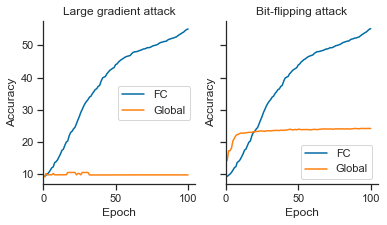

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
plt.style.use('tableau-colorblind10')

# fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True, sharex=True)
fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
ax, mapping = axes, path_mapping
for ax, mapping in zip(axes, [path_mapping, path_mapping1]):
    for k, v in mapping.items():
        data = filter_entries_from_json(v, "Global Validation")
        x = [d["E"] for d in data]
        y = [d["top1"] for d in data]
        if k == "GT":
            x = x[:60]
            y = y[:60]
        ax.plot(x, y, label=k)

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy")
    ax.set_xlim(0, )
    ax.legend()

axes[0].set_title("Large gradient attack")
axes[1].set_title("Bit-flipping attack")

fig.savefig("./outputs/large_gradient attack.pdf", bbox_inches="tight")